<a href="https://colab.research.google.com/github/julianovale/PO450/blob/main/Semana05_PO450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [197]:
# Definição da função
def model_f(x):
  y = 1 + 2*x - x**2 - x**3 + 3*np.sin(5*x)
  return y

In [198]:
# Geração de dados
n = 300 # número de amostras
x = 5*np.random.rand(n, 1)
noise = np.random.randn(n, 1)
y = model_f(x)+5*noise

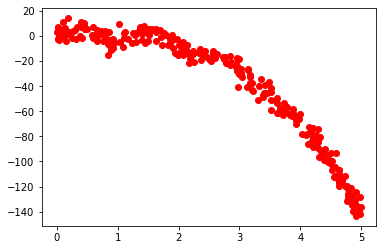

In [199]:
# Plotando a distribuição
plt.plot(x,y,'ro')
plt.show()

In [200]:
# Regressão

prop_test = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=prop_test)

def concat_model(x):
  z = np.concatenate((x, x**2, x**3, np.sin(5*x)), axis = 1)
  return z

z_train = concat_model(x_train)
z_test =  concat_model(x_test)

In [201]:
model_reg_lin = LinearRegression()
model_reg_lin.fit(z_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
model_reg_lin.coef_

array([[ 2.25978507, -1.18439964, -0.96537067,  3.08337874]])

In [203]:
y_pred_train = model_reg_lin.predict(z_train)
y_pred_test = model_reg_lin.predict(z_test)
res_train = y_train - y_pred_train
res_test = y_test - y_pred_test 

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(MSE_train)
print(MSE_test)

23.765434008396376
19.451357401808664


In [204]:
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

print(r2_score_train)
print(r2_score_test)

0.9878538039343157
0.9915080507371612


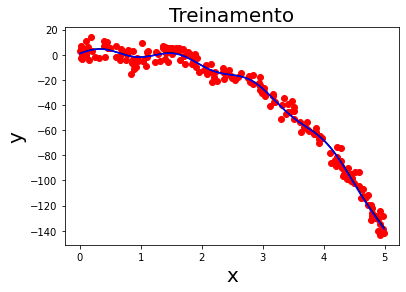

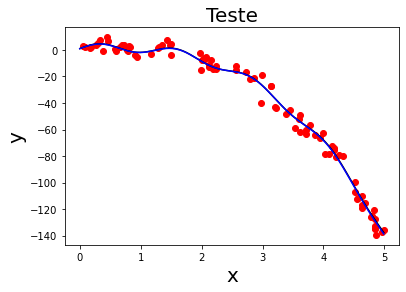

In [205]:
# figuras
plt.plot(x_train, y_train, 'ro')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
x_grid = np.arange(0, 5, 0.01)
x_grid.resize(x_grid.size,1)
Z_grid = concat_model(x_grid)
y_pred_grid = model_reg_lin.predict(Z_grid)
plt.title('Treinamento', fontsize=20)
plt.plot(x_grid, y_pred_grid,'k')
plt.plot(x_grid, model_f(x_grid),'b')
plt.show()

plt.plot(x_test, y_test, 'ro')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Teste', fontsize=20)
plt.plot(x_grid, y_pred_grid,'k')
plt.plot(x_grid, model_f(x_grid),'b')
plt.show()